# Data Analysis

Checking out the data from the Disaster Tweet kaggle dataset: https://www.kaggle.com/c/nlp-getting-started/data

The purpose of the excercise is to train a NLP Algorithm to recognize tweets about natural disasters. First we check out the data provided and see what we can do to prepare is for our NLP algorithms.

## Load the data
The data has been downloaded an is stored in the resource/data folder.
Kaggle has provided us with a train- and test dataset. The test data is is unlabeled and the challange is to submit its predictions to kaggle.

For now lets focus on the training data.

In [1]:
import pandas as pd

df = pd.read_csv('resources/data/train.csv')

Also lets download a fasttext object that holds wordvectors to 2 million words and load it.

In [2]:
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')

Configure the logger to display all messages.

In [3]:
import sys
import logging
main_logger = logging.getLogger()
main_logger.setLevel(logging.DEBUG)
stdout_handler = logging.StreamHandler(sys.stdout)
main_logger.addHandler(stdout_handler)

## Inspecting the data

Lets see whats in here.

In [4]:
print(df.columns)
print(df.values[0])

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
[1 nan nan
 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all' 1]


'id' seems self explanatory lets see whats in the other columns.

In [5]:
print('keyword:')
print(df['keyword'].value_counts())
print('')
print(f"Missing value count: {df['keyword'].isna().sum()} out of {len(df)}")

keyword:
fatalities               45
deluge                   42
armageddon               42
harm                     41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Missing value count: 61 out of 7613


Note that some keywords contain spaces.
Lets see if we can get a handle on the relation between the tweets and keywords by checking out some examples.

In [6]:
for tweet, keyword in df[['text', 'keyword']].values[0:50]:
    if type(keyword) is not str:
        continue
    print(tweet)
    print(keyword)
    print()
    

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
ablaze

We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw
ablaze

#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi
ablaze

Crying out for more! Set me ablaze
ablaze

On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N
ablaze

@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.
ablaze

INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA
ablaze

Barbados #Bridgetown JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J
ablaze

Ablaze for you Lord :D
ablaze

Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw
ablaze

on the outside you're ablaze and alive
but you're dead inside
ablaze

Had an awesome time visiting the CFC head office the ancop site and ablaz

Looks like the keyword is often in a word from the tweet, but not always. On an side note the data set seems to be sorted by keyword.

In [7]:
print('location:')
print(df['location'].value_counts())
print('')
print(f"Missing value count: {df['location'].isna().sum()} out of {len(df)}")

location:
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
qosqo                    1
Suva, Fiji Islands.      1
Rock Springs, WY         1
Detroit/Windsor          1
Bucks County, Pa         1
Name: location, Length: 3341, dtype: int64

Missing value count: 2533 out of 7613


Looks like the locations are mixed countries, states and cities some noise and a lot of missing values.

In [8]:
print('target:')
print(df['target'].value_counts())
print('')
print(f"Missing value count: {df['target'].isna().sum()} out of {len(df)}")

target:
0    4342
1    3271
Name: target, dtype: int64

Missing value count: 0 out of 7613


The data doesnt seems a bit unbalanced, about 57% is false and 43% is true.

texts:
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all

Forest fire near La Ronge Sask. Canada

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected

13,000 people receive #wildfires evacuation orders in California 

Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires

#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas

I'm on top of the hill and I can see a fire in the woods...

There's an emergency evacuation happening now in the building across the street

I'm afraid that the tornado is coming to our area...

Three people died from the heat wave so far

Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding

#raining 

CACHEDIR=C:\Users\Jos\.matplotlib
Using fontManager instance from C:\Users\Jos\.matplotlib\fontlist-v330.json
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
AxesSubplot(0.125,0.125;0.775x0.755)
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal 

findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Dead Kansas' (dead.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 4.971363636363637
findfont: score(<Font 'Bungee Inline' (BungeeInline-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatin

findfont: score(<Font 'Quicksand' (Quicksand-Medium.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.613636363636363
findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Const

findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 6.888636363636364
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Megrim' (Megrim.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.

findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Montserrat Subrayada' (MontserratSubrayada-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Playball' (Playball-Regular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 7.613636363636363
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.05
findfont: score(<F

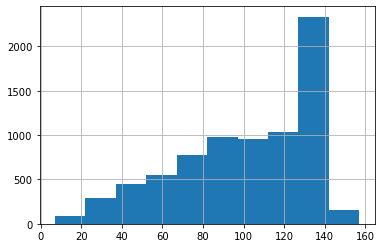

In [9]:
print('texts:')
for tweet in df['text'].values[:25]:
    print(tweet)
    print()
    
df['text_len'] = df['text'].apply(len)
print(df['text_len'].describe())
print()
print(df['text_len'].hist())

When pre-processing the text we will have to take into the account:
* hashtags
* urls
* mentions
* stopwords
* interpunction
* numbers
* CamelCased words from the hashtags and mentions.
* capitalized words

Finnaly the texts are between 7 and 157 characters long and most are between the 130 - 140 characters long.

## Preprocessing the texts.

Lets build a pipeline.

In [10]:
from sklearn.pipeline import Pipeline
from data_cleaning.transformers import tokenizer, urlRemover, punctuationRemover, numericsFilter, stopwordsFilter

pipeline = Pipeline([('tokenize', tokenizer()), ('remove_urls', urlRemover()), ('remove_punctuation', punctuationRemover()),
                     ('remove_numerics', numericsFilter()), ('stopwords_filter', stopwordsFilter())])

if __name__ == '__main__':
    df_clean = pipeline.transform(df)

tokenizer transforming data on 7 processes.
urlRemover transforming data on 7 processes.
punctuationRemover transforming data on 7 processes.
numericsFilter transforming data on 7 processes.
stopwordsFilter transforming data on 7 processes.


Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
['Our', 'Deeds', 'Reason', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us']

Forest fire near La Ronge Sask. Canada
['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada']

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
['All', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'No', 'evacuation', 'shelter', 'place', 'orders', 'expected']

13,000 people receive #wildfires evacuation orders in California 
['people', 'receive', 'wildfires', 'evacuation', 'orders', 'California']

Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
['Just', 'got', 'sent', 'photo', 'Ruby', 'Alaska', 'smoke', 'wildfires', 'pours', 'school']

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
['RockyFire', 'Update', 'California', 'Hwy', 'close

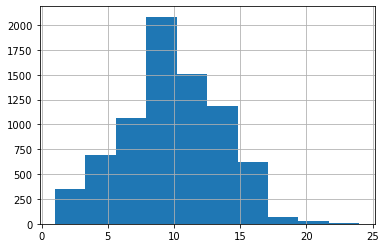

In [11]:
for text, tokens in df_clean[['text', 'tokens']].values[:10]:
    print(text)
    print(tokens)
    print()

df_clean['tokens_len'] = df_clean['tokens'].apply(len)
print(df_clean['tokens_len'].describe())
print()
print('freq count')
print(df_clean['tokens_len'].value_counts().sort_index())
print()
print('freq plot')
print(df_clean['tokens_len'].hist())


Looks like the pipeline extracted the token pretty neatly.
Every Tweet results in 1 to 25 tokens, with a mean of 10 and a mode of 11.

Lets see how which tokens are unknown to our fasttext model.

In [12]:
from collections import Counter
from tqdm import tqdm

def analyze_unknown_tokens(df):
    tokens_count = 0
    unknown_tokens = []
    examples = []
    for text, tokens in tqdm(df[['text', 'tokens']].values):
        tokens_count += len(tokens)
        text_in_examples = False
        for token in tokens:
            if token in ft:
                continue

            unknown_tokens.append(token)
            if text_in_examples is False and len(examples) <= 10:
                examples.append((text, token))
                text_in_examples = True

    unknown_tokens_count = Counter(unknown_tokens)
    print(f'{round(len(unknown_tokens)/tokens_count*100, 2)}% of tokens are unknown to the fasttext model.')
    print()

    print('Frequencies:')
    for label, freq in unknown_tokens_count.most_common(25):
        print(f'{label}: {freq}')
    print()
    print('Examples')
    for text, token in examples:
        print(f"unknown token: '{token}' found in tweet: '{text}'")
        print()
        
df_sample = df_clean.sample(frac = 0.15)

analyze_unknown_tokens(df_sample)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1142/1142 [01:18<00:00, 14.53it/s]

6.11% of tokens are unknown to the fasttext model.

Frequencies:
Ûªs: 15
Ûª: 11
ÛÒ: 7
prebreak: 5
ÛÏWhen: 5
ÛÓ: 5
ÛÏ: 4
6AUG: 4
Ûªre: 3
VoteJKT48ID: 3
IranDeal: 3
Sismo: 3
Ûªt: 3
Funtenna: 2
Ûªve: 2
ÛÏRichmond: 2
Totooo: 2
PAKPATTAN: 2
afterShock: 2
DeLo: 2
scuf: 2
OffensiveåÊContent: 2
Trfc: 2
FARRAKHAN: 2
CecilTheLion: 2

Examples
unknown token: 'KSBYNews' found in tweet: 'Plains All American Pipeline company may have spilled 40% more crude oil than previously estimated #KSBYNews @lilitan http://t.co/PegibIqk2w'

unknown token: 'PP15000266818' found in tweet: 'UNWANTED PERSON at 200 BLOCK OF SE 12TH AVE PORTLAND OR [Portland Police #PP15000266818] 17:10 #pdx911'

unknown token: 'JoseBasedGod' found in tweet: '@JoseBasedGod I'm obliterate you to the shadow realm.'

unknown token: 'Funtenna' found in tweet: '#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/qj3PVgaVN7 #prebreak #best'

unknown token: 'Olap' found in tweet: '#psd #special Olap 

About 6% of all tokens cannot be interpreted by our fasttext model. Not bad, but lets see if we can improve this.
the most common unknown tokens are mistakes that probaby entered the data as during the scraping process, nothing we can do about that. Other tokens jus seem to be words that are either misspelled or made-up. Finally a significant portion of these tokens are multiple words stuck together and snake case words. 

Snake case words are easy to split, so lets do that.

In [13]:
from data_cleaning.transformers import SnakeCaseSplitting
snake_case_splitter = SnakeCaseSplitting()
df_clean = snake_case_splitter.transform(df_clean)
    
df_sample = df_clean.sample(frac = 0.15)
analyze_unknown_tokens(df_sample)

SnakeCaseSplitting transforming data on 7 processes.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1142/1142 [00:06<00:00, 166.70it/s]

5.88% of tokens are unknown to the fasttext model.

Frequencies:
Ievingnc: 1
LJEV: 1
Sonof: 1
Kopite: 1
Papii: 1
Champoo: 1
Cwrites: 1
PWZ: 1
Portgass: 1
Iggas: 1
Jayyy: 1
Talerts: 1
Nwx: 1
Jhm: 1
Archambau: 1
Standwith: 1
Handerek: 1
Chorbjp: 1
Ztrophe: 1
Irh: 1
Rmageddon: 1
Xxh: 1
Cgov: 1
Gisuser: 1
Liveon: 1

Examples
unknown token: 'Ievingnc' found in tweet: '@CaraJDeIevingnc the bomb impact ratio hit beyond kyle js'

unknown token: 'LJEV' found in tweet: '4 equipment ego break upon dig your family internet hoke excepting versus a sinking term: dfLJEV'

unknown token: 'Sonof' found in tweet: '@SonofBaldwin and he's the current Nova in the bookslast I checked..he was tied into the books in 2011 after Rider died during Annihilation'

unknown token: 'Kopite' found in tweet: '@KopiteLuke1892 Its broken its fully exploded.'

unknown token: 'Papii' found in tweet: '#PapiiChampoo What I enjoy most about the Obama era is the civility: Prez says GOP supports Iranian 'Death to ... http://t.c

That's a little bit better. So lets add the SnakeCaseSplitter to our pipeline and use this to try out some algorithms.